In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import statistics
l1=[]
file = open(r"positive.txt","r")
for line in file.read().split('\n'):
    vs = analyzer.polarity_scores(line)
    #print(vs)
    l1.append(vs['compound'])

x=statistics.mean(l1)
print("mean of the content is: ",x)
    
file.close()

mean of the content is:  0.5370764705882353


In [38]:
from textblob import TextBlob

pos_count = 0
pos_correct = 0
l1=[]

with open("positive.txt","r") as f:
    for line in f.read().split('\n'):
        analysis = TextBlob(line)

        if analysis.sentiment.polarity > 0:
            if analysis.sentiment.polarity > 0:
                pos_correct += 1
            pos_count +=1
        s=analysis.sentiment.polarity   
        l1.append(s)
            
x=statistics.mean(l1)
print("mean of positive content is: ",x)

print("Positive accuracy = {}% via {} samples".format(pos_correct/pos_count*100.0, pos_count))

mean of positive content is:  0.4865213010400176
Positive accuracy = 100.0% via 14 samples


In [33]:
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import statistics

import time
analyzer = SentimentIntensityAnalyzer()

pos_count = 0
pos_correct = 0

l1=[]
l2=[]
with open("positive.txt","r") as f:
    for line in f.read().split('\n'):
        vs = analyzer.polarity_scores(line)
        if not vs['neg'] > 0.1:
            if vs['pos']-vs['neg'] > 0.5:                      
                pos_correct += 1
            pos_count +=1
        l1.append(vs['compound'])

x=statistics.mean(l1)
print("mean of positive content is: ",x)

neg_count = 0
neg_correct = 0

with open("negative.txt","r") as f:
    for line in f.read().split('\n'):
        vs = analyzer.polarity_scores(line)
        if not vs['pos'] > 0.1:
            if vs['pos']-vs['neg'] <= 0.5:
                neg_correct += 1
            neg_count +=1
            l2.append(vs['compound'])

y=statistics.mean(l2)
print("mean of negetive content is: ",y)


print("Positive accuracy = {}% via {} samples".format(pos_correct/pos_count*100.0, pos_count))
print("Negative accuracy = {}% via {} samples".format(neg_correct/neg_count*100.0, neg_count))
print("Total percentage of content is: {}%".format((x+y)*50))


mean of positive content is:  0.5370764705882353
mean of negetive content is:  -0.14006
Positive accuracy = 41.17647058823529% via 17 samples
Negative accuracy = 100.0% via 15 samples
Total percentage of content is: 19.850823529411766%


In [34]:
from textblob import TextBlob

pos_count = 0
pos_correct = 0
l1=[]
l2=[]
with open("positive.txt","r") as f:
    for line in f.read().split('\n'):
        analysis = TextBlob(line)

        if analysis.sentiment.subjectivity >= 0.1:
            if analysis.sentiment.polarity > 0:
                pos_correct += 1
            pos_count +=1
        s=analysis.sentiment.polarity   
        l1.append(s)
            
x=statistics.mean(l1)
print("mean of positive content is: ",x)

with open("negative.txt","r") as f:
    for line in f.read().split('\n'):
        analysis = TextBlob(line)
        if analysis.sentiment.subjectivity <= 0.1:
            if analysis.sentiment.polarity <= 0:
                neg_correct += 1
            neg_count +=1
        t=analysis.sentiment.polarity   
        l2.append(t)
            
y=statistics.mean(l2)
print("mean of negative content is: ",y)

            
print("Positive accuracy = {}% via {} samples".format(pos_correct/pos_count*100.0, pos_count))
print("Negative accuracy = {}% via {} samples".format(neg_correct/neg_count*100.0, neg_count))

mean of positive content is:  0.4865213010400176
mean of negative content is:  -0.1433333333333333
Positive accuracy = 100.0% via 14 samples
Negative accuracy = 100.0% via 26 samples


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import statistics
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer 
from textblob import TextBlob

file = open(r"comments.txt","a+")
comment=input("Enter comment: ")


def clean_text(cmnt):
    #Remove RT
    cmnt = re.sub(r'RT', '', cmnt)
    
    #Fix &
    cmnt = re.sub(r'&amp;', '&', cmnt)
    
    #Remove punctuations
    cmnt = re.sub(r'[?!.;:#-//,@]', '', cmnt)
    
    #Convert to lowercase to maintain consistency
    cmnt=cmnt.lower()

    #Tokenization
    cmnt=nltk.word_tokenize(cmnt)
    print(cmnt)
    
    #lemmatization
    lemma = WordNetLemmatizer()
    for i in cmnt:
        print(lemma.lemmatize(i, pos="v"),end=" ")
    
    #Stopwords remove
    cmnt = " ".join([w for w in cmnt if w not in stopwords.words('english')])
    print (cmnt)
    
    
    return (cmnt)

    
x = clean_text(comment)
print(x)

file.write("{}\n".format(x))
file.close()

In [46]:
l1=[]
pos_count = 0
pos_correct = 0
with open(r"comments.txt","r") as file:
    for line in file.read().split('\n'):
        analysis = TextBlob(line)
        #correct spelling
        analysis = analysis.correct()
        print (analysis)

        if analysis.sentiment.subjectivity > 0.5:
            if analysis.sentiment.polarity > 0.1:
                pos_correct += 1
            pos_count +=1
        s=analysis.sentiment.polarity   
        l1.append(s)
            
x=statistics.mean(l1)
print("mean of positive content is: ",x)
neg_count = 0
neg_correct = 0

with open(r"comments.txt","r") as file:
    for line in file.read().split('\n'):
        analysis = TextBlob(line)
         #correct spelling
        analysis = analysis.correct()
        print (analysis)

        if analysis.sentiment.subjectivity <= 0.5:
            if analysis.sentiment.polarity <= 0.1:
                neg_correct += 1
            neg_count +=1
            
print("Positive accuracy = {}% via {} samples".format(pos_correct/pos_count*100.0, pos_count))
print("Negative accuracy = {}% via {} samples".format(neg_correct/neg_count*100.0, neg_count))
file.close()

outstanding work get
happy journey
best day life

good job
need improvement
happy day
nice shoes

mean of positive content is:  0.4888888888888889
outstanding work get
happy journey
best day life

good job
need improvement
happy day
nice shoes

Positive accuracy = 100.0% via 5 samples
Negative accuracy = 75.0% via 4 samples


In [18]:
from textblob import TextBlob

pos_count = 0
pos_correct = 0

with open("fb_data.txt","r") as f:
    for line in f.read().split('\n'):
        analysis = TextBlob(line)

        if analysis.sentiment.polarity >= 0.1:
            if analysis.sentiment.polarity > 0:
                pos_correct += 1
            pos_count +=1


neg_count = 0
neg_correct = 0

with open("fb_data.txt","r") as f:
    for line in f.read().split('\n'):
        analysis = TextBlob(line)
        if analysis.sentiment.polarity <= -0.1:
            if analysis.sentiment.polarity <= 0:
                neg_correct += 1
            neg_count +=1

print("Positive accuracy = {}% via {} samples".format(pos_correct/pos_count*100.0, pos_count))
print("Negative accuracy = {}% via {} samples".format(neg_correct/neg_count*100.0, neg_count))

Positive accuracy = 100.0% via 690 samples
Negative accuracy = 100.0% via 58 samples


In [11]:
import pandas as pd 
import sklearn
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import re
import string
import io  
from nltk.corpus import stopwords  
#from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer
import warnings
warnings.filterwarnings(action='ignore')


dataset = pd.read_csv('fb_sentiment.csv', encoding = 'ISO-8859-1')

dataset.head()

#for index, cmnts in enumerate(dataset["FBPost"][:10]):
    #print(index+1,".",cmnts)

#cleaning text

def clean_text(FBPost):
    #Remove RT
    FBPost = re.sub(r'RT', '', FBPost)
    
    #Fix &
    FBPost = re.sub(r'&amp;', '&', FBPost)
    
    #Remove punctuations
    FBPost = re.sub(r'[?!.;:#-//,@]', '', FBPost)
    
    #Convert to lowercase to maintain consistency
    FBPost = FBPost.lower()
    
    #Tokenization
    tokenizer = RegexpTokenizer(r'\w+')
    
    
    #lemmatization
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    FBPost = "".join([lemmatizer.lemmatize(i) for i in FBPost])
        
    #Stopwords remove
    FBPost = "".join([w for w in FBPost if w not in stopwords.words('english')])
        
    return FBPost

dataset['clean_text']  = dataset.FBPost.apply(lambda x: clean_text(x))


print("Ater cleaning:/n/n")
for index, cmnts in enumerate(dataset["clean_text"][:10]):
    print(index+1,".",cmnts)

Ater cleaning:/n/n
1 . rug runner n   u enr hve ehng   wh he urer hpwwwznccrcunlevencegengflrbzrhebkpb004fpz452ref=p_rhf_p__1 he e rne knw nw  wll u ge pur cp 
2 . here  ngle    knle ju re h 19h cenur r "he gh f run ln"  bu  n frenchercn nn n h g le rnprng  wn cr he ce fr cknc ln  chebgn  n he gh h
3 . f u re f nnfcn check u hpwwwzncref=nb_b_nurl=erchl3pfelkewr=nelleleezwlerx=0=0
4 . gh f run ln  uppel nnfcn
5 . wh  brne n nble vern f he knle  uch re expenve hn he knle
6 . r   u en he nk  be creful bk u bu fr he knle re fr h pece f elecrnc n vce ver   lve  knle here re peple h wer b he nk  he lke he clr creene   wn n ereer h   reer   n nee clr  he knle ber l lnger n he un n  hev whch cn ke  fference fer reng fr  few hur 
7 . knle  wee ne gre
8 .  lve ne
9 . eh  hnk ngle re  b e bg ne uhr lre ne he rke b  huge fcr nw u re leng he cpee n prce pn wh ne uhr lbe gvng le cnen fr he ne
10 .  ugjher lve her


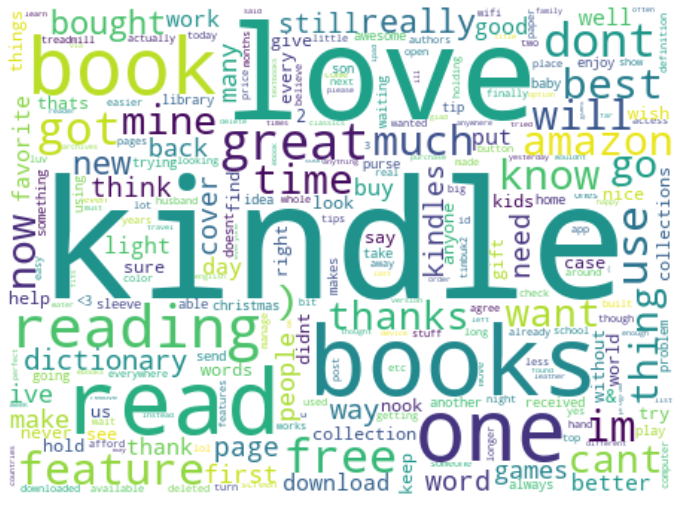

KeyError: 'dataset'

In [58]:
def gen_freq(FBPost):
    #Will store the list of words
    words = []

    #Loop over all the comments and extract words into words:
    for fb_words in FBPost.split():
        words.extend(fb_words)

    #Create word frequencies using words:
    word_freq = pd.Series(words).value_counts()
    
    return word_freq



text = dataset.FBPost.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=250, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
#Check whether a negation term is present in the text
def any_neg(words):
    for word in words:
        if word in ['n', 'no', 'non', 'not'] or re.search(r"\wn't", word):
            return 1
    else:
        return 0

#Check whether one of the 100 rare words is present in the text
def any_rare(words, rare_100):
    for word in words:
        if word in rare_100:
            return 1
    else:
        return 0

#Check whether prompt words are present
def is_question(words):
    for word in words:
        if word in ['when', 'what', 'how', 'why', 'who']:
            return 1
    else:
        return 0
#CHECK STOPWORDS
def stopword(words):
    for word in words:
        if word in STOPWORDS:
            return 1
    else:
        return 0
    
def remove_punctuation(words):
    for word in words:
        if word in string.punctuation:
            return 1
        else:
            return 0
        

word_freq = gen_freq(dataset.clean_text.str)
#100 most rare words in the dataset
rare_100 = word_freq[-100:]
#Number of words in a comments
dataset['word_count'] = dataset.clean_text.str.split().apply(lambda x: len(x))
#Negation present or not
dataset['any_neg'] = dataset.clean_text.str.split().apply(lambda x: any_neg(x))
#Prompt present or not
dataset['is_question'] = dataset.clean_text.str.split().apply(lambda x: is_question(x))
#stopwords
dataset['stopword'] = dataset.clean_text.str.split().apply(lambda x: stopword(x))
#Any of the most 100 rare words present or not
dataset['any_rare'] = dataset.clean_text.str.split().apply(lambda x: any_rare(x, rare_100))
#Character count of the tweet
dataset['char_count'] = dataset.clean_text.apply(lambda x: len(x))
#Punctuation
dataset['remove_punctuation']  = dataset.clean_text.str.split().apply(lambda x: remove_punctuation(x))


X = dataset[['word_count', 'any_neg', 'any_rare', 'char_count', 'is_question', 'stopword', 'remove_punctuation']]
y = dataset.Label
#dataset.columns
columns=['FBPost', 'Label', 'clean_text', 'word_count', 'any_neg',
       'is_question', 'stopword', 'any_rare', 'char_count',
       'remove_punctuation']
data = pd.DataFrame(dataset.drop(columns,axis=1,inplace=False))
data['dataset'].value_counts().plot(kind='bar')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=None )
svclassifier = SVC() #(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
k = svclassifier.score(X_train, y_train)
#Training score
print('Training Score', k )
test_predict = svclassifier.predict(X_test)
k = svclassifier.score(X_test, y_test)
#Testing score 
print('Test score    ', k )
pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred)*100, "%")

NameError: name 'X' is not defined

In [1]:
#Initialize GaussianNB classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=None)
model = GaussianNB()
#Fit the model on the train dataset
model = model.fit(X_train, y_train)
#Make predictions on the test dataset
pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred)*100, "%")

#plt.scatter(X_test, y_test)
#plt.plot(X_test, pred)
#plt.show()

NameError: name 'train_test_split' is not defined